In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
#Opg 1: Vekselspenning med frek.generator og multimeter / Måling av RMS

#Multimeter måling: Ragne 3.200V, +-(2%+2)
# Bridge rectifier converts AC to DC. Capacitor inside is fitted for freq (45-500Hz) daily use.
# When increased multimeter RMS(voltage) decreases to zero. Does not have time to charge the capacitor

#Sinusbølge
#50 Hz
V_multi_50 = 0.703 #V, 50 Hz
V_mul_err = V_multi_50*0.02+0.002
print(f"Error for RMS multimeter {V_mul_err:.3f} V")
V_osci_50 = 0.707 #V

# 500 Hz
V_multi_500 = 0.700
V_osci_500 = 0.707  #fikk 0.7067

# 1000 Hz
V_multi_1000 = 0.690
V_osci_1000 = 0.707 #fikk 0.7067

# 5 KHz
V_multi_5k = 0.496
V_osci_5k = 0.707 #fikk 0.7067



Error for RMS multimeter 0.016 V


In [ ]:
#Firkantbølge
#50 Hz
V_sm_50 = 1.10 #V
V_so_50 = 0.997 #V

# 500 Hz
V_sm_500 = 1.06 #V
V_so_500 = 0.997 #V

# 1000 Hz
V_sm_1k = 1.01 #V
V_so_1k = 0.995 #V

# 5 KHz
V_sm_5k = 0.644 #V
V_so_5k = 0.994 #V


#For sinussigalet: Sett på en DC-komponent på signalgeneratoren(“Forskyvning”). Hvordan kan du måle denne? (to metoder)
# 1. Multimeter, sett på DC instilling så vil den måle DC-komponenten
# 2. Osciloscope: likestrøm gj.snitt (likespenning gj.snitt) in piscoscope. (AC signal will avg to 0)

In [ ]:
#Opg 2

#Måler motstand over inductor
ohm_ind = 5.6  # +-(0.5%+2)
s_ohm_ind = 5.6*0.005+0.2

print(f" err ind: {s_ohm_ind}")

#Motstand per meter
k = 0.3547 # +-0.0004
s_k = 0.0004
#print(f"Rel err coil meter: {s_k/k}")

#Lengde på coil, delen som er spunnet rundt
l = 2.9/100 # 2.9 cm
s_l = np.sqrt((0.1/1000)**2 + (0.05/1000)**2 )*l
print(f"Rel err lengde: {s_l/l*100}%")

#Finn lambda (lengde på wire)
# ohm / (ohm/m) = m
lambda_ = ohm_ind / k
s_lambda = np.sqrt((s_ohm_ind/ohm_ind)**2+(s_k/k)**2)*lambda_
# sqrt(partial derivatives* delta_x)** 2 + ....
# ohm_der = 1/k  ,  k_der = - ohm_ind/k**2
#s_lambda = np.sqrt((s_ohm_ind/k)**2+(s_k*ohm_ind/k**2)**2) # likt tall som første metode
#print(f"Lambda rel err {s_lambda/lambda_}")
print(f"Lambda: {lambda_:.1f} +- ({s_lambda:.1f})m")

u_0 = 1.256637e-6 #vacuum permeability
L = u_0*lambda_**2/(4*np.pi*l)
#Use partial instead

S_L = np.sqrt((2*s_lambda/lambda_)**2 + (s_l/l)**2 )*L

print(f"Induktans: {L*1000:.2f} +- ({S_L*1000:.2f}) mH")


 err ind: 0.228
Rel err lengde: 0.011180339887498949%
Lambda: 15.8 +- (0.6)m
Induktans: 0.86 +- (0.07) mH


Slope 1: 175.64004404472723
Linear regression; removed last 2 data point
Slope 2: 52.85930010726411
Stigningstall 5.29e-11
Std_error 1.14e-12
Intercept -0.77
Induktans L: 0.77 +- 0.11 mH


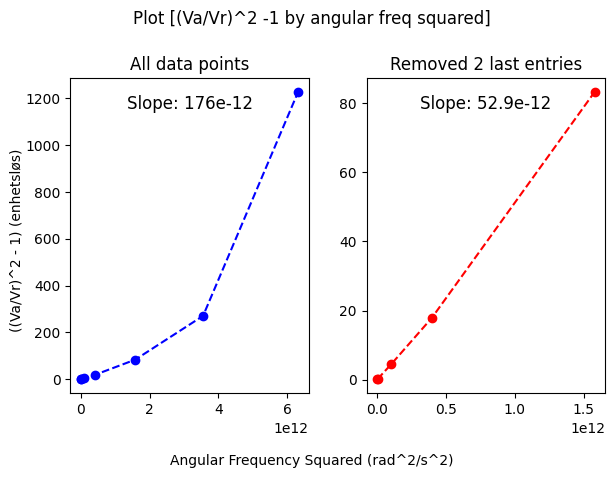

In [ ]:
#Plotte (V_a/V_r)**2 : V_a input signalet, V_r spenning over resistor (100R)
Va = np.array([107.6, 114.4, 227.2, 387.6, 576.5, 584.8, 496.8]) #[mV] spenning over hele kretsen
Vb = np.array([101, 100.7, 97.84, 89.31, 62.8, 35.5, 14.18]) #  [mV] spenning over resistor, Vr
frek = np.array([400, 10e3, 50e3, 100e3, 200e3, 300e3, 400e3]) # frequency [Hz]
phase = np.array([1.78, 19.9, 62.83, 74.36, 81.71, 81.38, 82.62]) #[grader 0-360] phase shift

ang_frek = 2*np.pi*frek  # angular frequency
ang_frek_sq = ang_frek**2

x = ang_frek_sq
y = (Va/Vb)**2-1



slope, intercept, R, P, std_err = stats.linregress(x,y)
print(f"Slope 1: {slope*1e12}")

print("Linear regression; removed last 2 data point")
slope, intercept, R, P, std_err = stats.linregress(x[:-2],y[:-2])
print(f"Slope 2: {slope*1e12}")
print(f"Stigningstall {slope:.2e}")
print(f"Std_error {std_err:.2e}")
print(f"Intercept {intercept:.2f}")

R = 100+ohm_ind
L_data = np.sqrt(slope*R**2) # L = sqrt(a * R**2)
L_error = np.sqrt(std_err*R**2)
print(f"Induktans L: {L_data*1e3:.2f} +- {L_error*1e3:.2f} mH")



#Plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Plot [(Va/Vr)^2 -1 by angular freq squared]')

# Set common xlabel and ylabel using fig
fig.text(0.5, 0.04, 'Angular Frequency Squared (rad^2/s^2)', ha='center', va='center')
fig.text(0.04, 0.5, '((Va/Vr)^2 - 1) (enhetsløs)', ha='center', va='center', rotation='vertical')

# Set slope text
ax1.text(0.5, 0.9, 'Slope: 176e-12', fontsize=12, ha='center', transform=ax1.transAxes)
ax2.text(0.5, 0.9, 'Slope: 52.9e-12', fontsize=12, ha='center', transform=ax2.transAxes)


plt.tight_layout(rect=[0.05, 0.1, 1, 0.95])  # Adjust the rect parameter as needed

ax1.plot(x, y, '--bo')
ax2.plot(x[:-2],y[:-2], '--ro')
ax1.set_title("All data points")
ax2.set_title("Removed 2 last entries")
plt.savefig("img.png")
plt.show()


# Z^2 = R_tot^2 + w^2*L^2 , Impedans/impedance,  w: angular freq -> w = f*2*pi
# Low freq -> inductor behaves like a resistance. About 5.6/(100+5.6) -> 6-7% of total circuit, small w



Differance in L: 0.09 mH < TotErr: 0.17 Close to what we calculated from equation (5) earlier
[0.01077  0.01069  0.01061  0.01048  0.01032  0.01013  0.0099   0.009646]
[0.01083219 0.01015059 0.00933235]


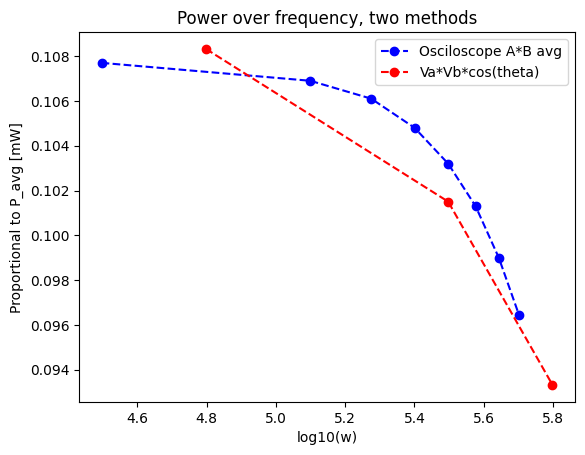

In [42]:
#Differance in induktans, L
L_totErr = np.sqrt((L_error/L_data)**2+(S_L/L)**2) #total error L1, L2

print(f"Differance in L: {np.abs(L_data-L)*1e3:.2f} mH < TotErr: {L_totErr:.2f} Close to what we calculated from equation (5) earlier")

# 2.3: Har du bygget en ren induktor? Does it fit graph?
# At low freq the inductor behaves like a resistance with approx 5% of circuit voltage (5.6 ohm / (100+5.6))
# The graph fits quite closely and gives us L quite close to theoretical, keepining in mind error.
#But not perfect or intercept would be exactly at -1 from eq. 11

# 2.4: Approximation of eq.5: Close to L, within range of error. Not perfect inductors.

# 2.5: hva betyr det at at effektavsetningen kan være negativ?
# P = V_a*V_b  =  V_a * I_r * 1/R = I*V*1/R, V_b = V_r = I_r/R increased freq -> increase phase shift to 90 degrees. (subsitution only valid for resistor)
# Avg P goes towards 0 as freq increase.
# P at some point can be negative,  Temporaily stores energy/negative power in inductor (magnetic field), circuit gives back energy.
# Still average power always > 0.
# P = I*V = V**2/R = Va*Vb > 0, only apples if only a resistor
# P_snitt = I_rms * V_rms * cos(phase)
#

# 2.6 : Plot P_avg for circuit, function of lopg10(w)
# We see that the two methods of calculating follow quite closely. Decreases P as phase shift increase


# Why does the phase shift increase when freq increase
# RLC circuit (resistor, inductor, capacitor)
# When you quickly change current, inductor will induce emf which will resist the current in the circuit. (?)

freq = np.array([5e3, 20e3, 30e3, 40e3, 50e3, 60e3, 70e3, 80e3]) #Hz
P_snitt = np.array([10.77, 10.69, 10.61, 10.48, 10.32, 10.13, 9.90, 9.646])
P = P_snitt*1e-3
ang_freq = 2*np.pi*freq
freq_log = np.log10(ang_freq)

#Plot Vb*Va*cos(theta)
# P = V*I
theta = np.radians(phase[1:4])
freq = frek[1:4]*2*np.pi
freq_log_2 = np.log10(freq)
p = Va[1:4]*Vb[1:4]*np.cos(theta)*1e-6
x2 = freq_log_2
y2 = p
print(P)
print(p)


x = freq_log
y = P/100*1e3
plt.title("Power over frequency, two methods")
plt.plot(x,y, '--bo', label = "Osciloscope A*B avg" )
plt.plot(x2, y2/100*1e3, '--ro', label = "Va*Vb*cos(theta)")
plt.xlabel("log10(w)")
plt.ylabel("Proportional to P_avg [mW]")
plt.legend()